### Récupération du dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

display(df)
df.info()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


### Gestion des doublons et des valeurs manquantes

In [2]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
Experience Years    0
Salary              0
dtype: int64


### Vérification de la validité des données

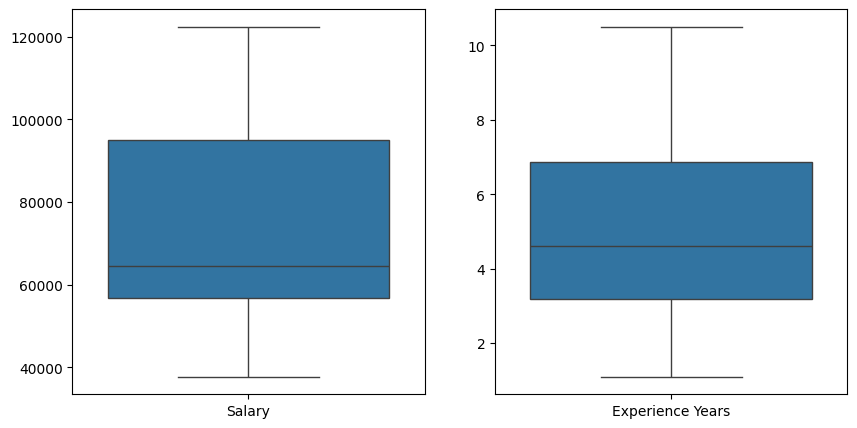

In [3]:
# Vérifier la distribution des données quantitatives avec 2 boxplots sur 2 sous-figures
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df[['Salary']], ax=ax[0])
sns.boxplot(data=df[['Experience Years']], ax=ax[1])
plt.show()
# Les données semblent cohérentes

### Analyse des relations entre les données

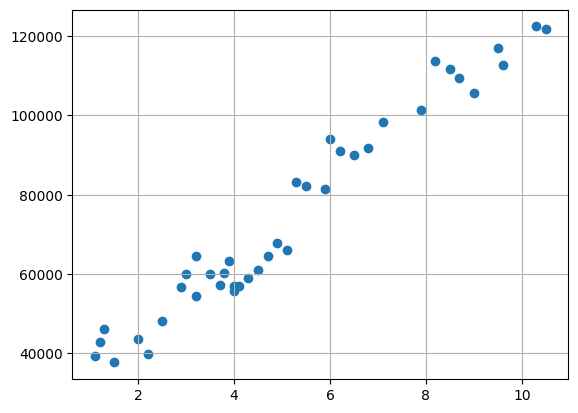

In [4]:
# Nuage de points entre le salaire et les années d'expérience
plt.scatter(df['Experience Years'],df['Salary'])
plt.grid(True)
plt.show()
# La relation semble linéaire

In [5]:
# Test statistique de Fisher pour vérifier si les années d'expérience sont significatives pour prédire le salaire
from sklearn.feature_selection import f_regression
print('F-statistique :', f_regression(df[['Experience Years']], df['Salary'])[0], 'p-value :', f_regression(df[['Experience Years']], df['Salary'])[1])
# La p-value est inférieure à 0.05, donc on rejette l'hypothèse nulle
# Les années d'expérience sont significatives pour prédire le salaire

F-statistique : [823.31561097] p-value : [2.32430916e-27]


### Preprocessing

In [6]:
# Séparation features / target
X = df[['Experience Years']]
y = df['Salary']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Entraînement du modèle

In [7]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

print ("Ordonnée à l'origine",slr.intercept_)
print ("Pente",slr.coef_)

Ordonnée à l'origine 26541.83672367176
Pente [9478.77791176]


### Evaluation du modèle

##### Validation croisée : R² et RMSE

In [8]:
# Validation croisée sur 4 folds avec calcul du R² sur les échantillons de test
from sklearn.model_selection import cross_validate
scores = cross_validate(slr,X_train,y_train,cv=4,return_train_score=True)
print(scores)
print ("Moyenne des R² test validation croisée :",scores['test_score'].mean())

# Conclusion : le R² est de 0.94 sur les échantillons de test en validation croisée, ce qui est très bon.

# Calcul du RMSE sur les échantillons de test
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
cv_pred = cross_val_predict(slr,X_train,y_train,cv=4)
print(y_train.values[0:5])
print(cv_pred[0:5])
print ("RMSE validation croisée :",np.sqrt(mean_squared_error(cv_pred,y_train)))

# Conclusion : la prédiction semble proche des valeurs réelles en validation croisée

{'fit_time': array([0.0030005 , 0.00200057, 0.00096893, 0.00297332]), 'score_time': array([0.00100088, 0.00099993, 0.00103045, 0.00099707]), 'test_score': array([0.96035869, 0.95937668, 0.93981894, 0.92670085]), 'train_score': array([0.95969046, 0.95374896, 0.96036591, 0.96542425])}
Moyenne des R² test validation croisée : 0.9465637887048403
[ 81363  54445  60200 101302 109431]
[ 82671.18991465  57181.72816304  62846.05299673 101552.27269362
 109104.70580521]
RMSE validation croisée : 5412.601424885463


##### Prédiction

In [9]:
# Prédiction sur l'échantillon de test
y_pred = slr.predict(X_test)

##### Vérification de la linéarité

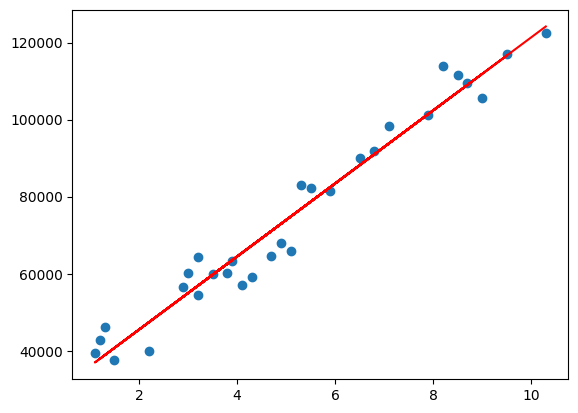

In [10]:
# Droite de régression sur les données d'entraînement
plt.scatter(X_train,y_train)
plt.plot(X_train,slr.predict(X_train),color='red')
plt.show()

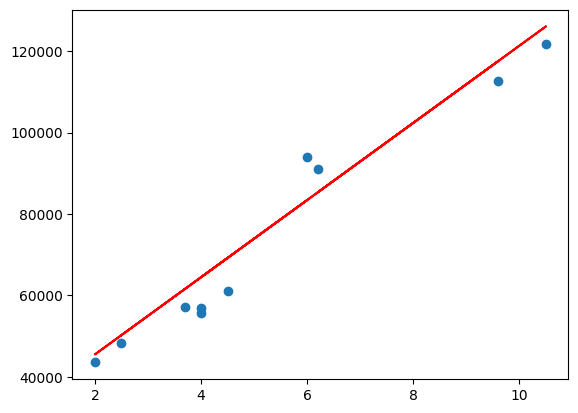

In [11]:
# Droite de régression sur les données de test
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')
plt.show()

# Conclusion : la linéarité de la relation entre le salaire et les années d'expérience est confirmée

##### Analyse des résidus

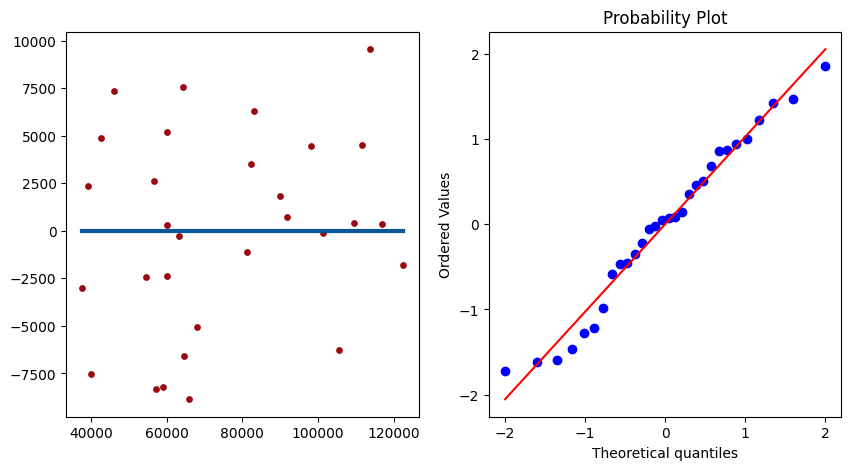

In [12]:
# Calcul des résidus sur l'échantillon d'entraînement
residus = y_train - slr.predict(X_train)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(ax[0])
# Afficher la distribution des résidus
plt.scatter(y_train, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')

# Normaliser les résidus
import scipy.stats as stats
residus_norm = (residus-residus.mean())/residus.std()

plt.sca(ax[1])
# Afficher le QQ-plot des résidus normalisés
stats.probplot(residus_norm, plot=plt)
plt.show()

# Conclusion : sur l'échantillon d'entraînement, les erreurs sont centrées, de variance constante, indépendantes et gaussiennes

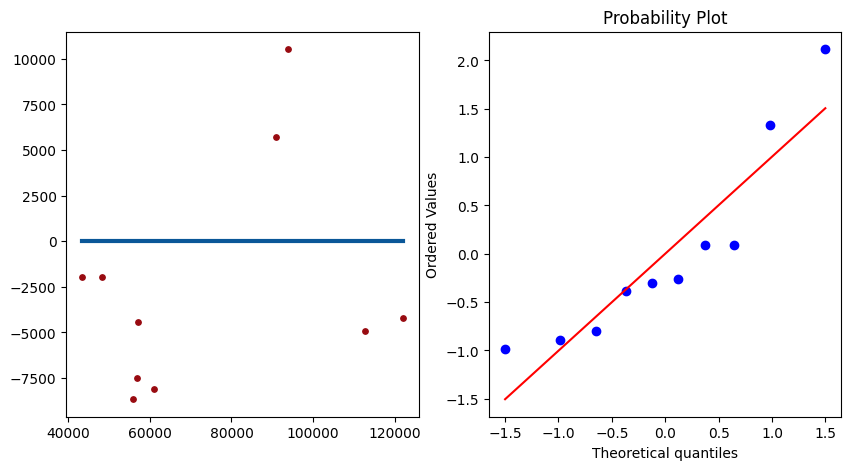

In [13]:
# Calcul des résidus sur l'échantillon de test
residus = y_test - y_pred

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(ax[0])
# Afficher la distribution des résidus
plt.scatter(y_test, residus, color='#980a10', s=15)
plt.plot((y_test.min(), y_test.max()), (0, 0), lw=3, color='#0a5798')

# Normaliser les résidus
import scipy.stats as stats
residus_norm = (residus-residus.mean())/residus.std()

plt.sca(ax[1])
# Afficher le QQ-plot des résidus normalisés
stats.probplot(residus_norm, plot=plt)
plt.show()

# Conclusion : sur l'échantillon de test, les erreurs sont centrées, de variance constante, indépendantes et gaussiennes
# Le modèle linéaire semble adapté

##### R² et RMSE

In [14]:
# Calcul du R² sur l'échantillon d'entrainement et de test
from sklearn.metrics import r2_score
print("R² train:",r2_score(y_train, slr.predict(X_train)))
print("R² test:",r2_score(y_test, y_pred))

# Calcul de l'erreur quadratique moyenne sur l'échantillon d'entrainement et de test
from sklearn.metrics import mean_squared_error
print("RMSE train:",np.sqrt(mean_squared_error(y_train, slr.predict(X_train))))
print("RMSE test:",np.sqrt(mean_squared_error(y_test, y_pred)))

# A la main
def RMSE(reel,pred):
    return np.sqrt(np.mean(np.power(reel-pred,2)))

# Le R² est de 0.94 sur l'échantillon de test, ce qui est très bon
# Le RMSE de l'échantillon de test est légèrement supérieur à celui de l'échantillon d'entraînement, ce qui pourrait indiquer une difficulté à généraliser

R² train: 0.9599196176482263
R² test: 0.9426749383532558
RMSE train: 5054.327914746098
RMSE test: 6394.120160024088
